# Predecting heart disease using machine learning

The note book looks into a machine learning model which can classisfy if the person has heart disease of not by looking at the information about the patient.

## preparing the tools

we're going to use pandas ,Matplotlibs and numpy for data analysis and manupulation

In [1]:
# Import al the tools we need 

# regular EDA (exploratory and data analysis) and plotting  libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our model to appear inside the notebook
%matplotlib inline 

#import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evalution

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import plot_roc_curve , plot_confusion_matrix

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## Data exploration (exploratory data analysis aka EDA)

The goal is here is to find out more about data and become a subject matter expert on the dataset you're working with.

1. what question(s) are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add , change or remove features to get more ouot of your data?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

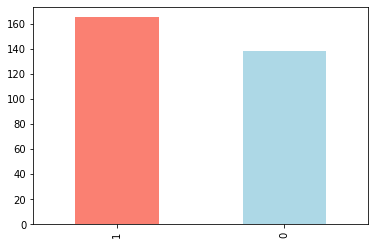

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease Frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


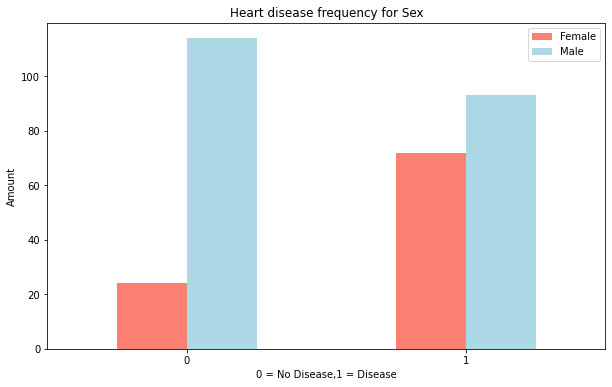

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color =["salmon","lightblue"])
plt.title("Heart disease frequency for Sex")
plt.xlabel("0 = No Disease,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age Vs. Max heart rate for heart disease

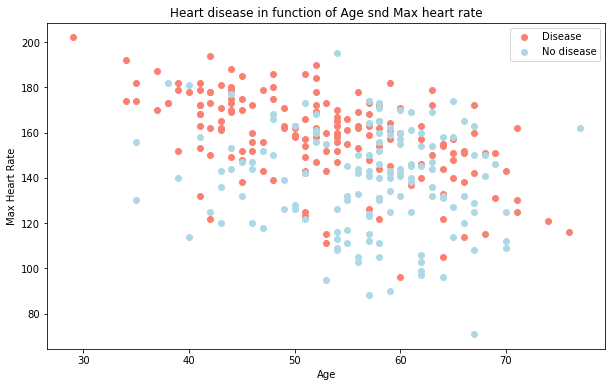

In [12]:
#creating anothe rfig
plt.figure(figsize=(10,6))

#scatter
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target==1],
           c="salmon");

# scatter with negative examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
plt.title("Heart disease in function of Age snd Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No disease"]);

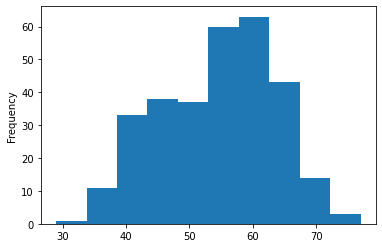

In [13]:
#check the distribution of the age column with the histogram
df.age.plot.hist();

### Heart Disease frequency per chest Pain type

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


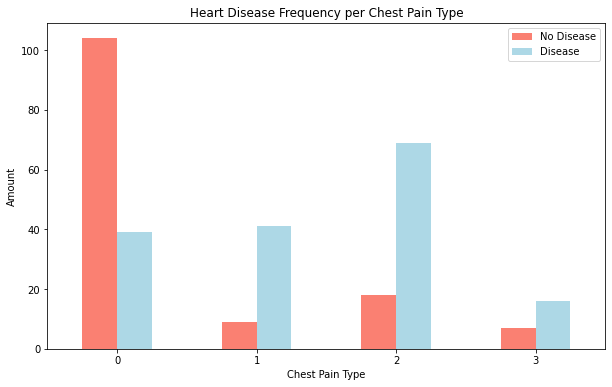

In [15]:
#make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])

#add some communication

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


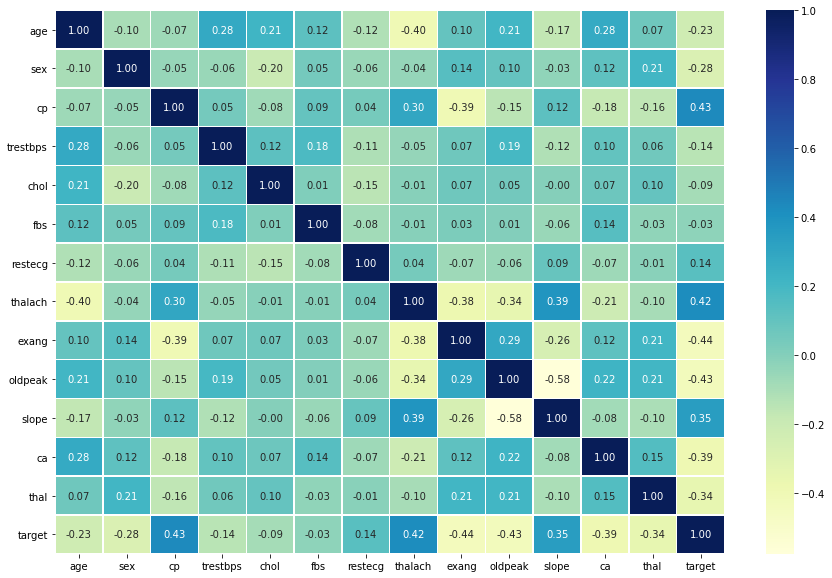

In [17]:
# lets make our correlation matix more prittier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")


### 5. Modeling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# spilt data into x and y

X = df.drop("target",axis=1)
y = df["target"]

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
#spilt data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

now we've got our data into train and test sets, it's time to fit it in a model

we'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set

we're going to us  e3 different machine learning models :
1. Logestic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [24]:
#   put models ina dictionary 

models = {"Logestic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training features
    X_test : testing features
    y_train : training target
    y_test : testing target
    """
    np.random.seed(42)
    
    # create a empty dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(X_train,y_train)
        #evaluate the model and append its score to the model_score
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [25]:
models_scores= fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
models_scores

/home/k_s_m/code/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparison

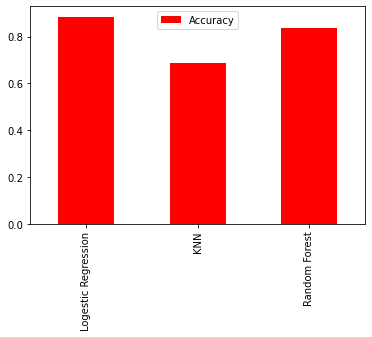

In [26]:
model_compare = pd.DataFrame(models_scores,index=["Accuracy"])
model_compare.T.plot.bar(color=["red"]);

now we've got a baseline model and we know that our models first predictiom arn't always what we should based out
our next step off. what should we do?

let's look at the following :
* Hyperparameter tuning
* feature importance
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* roc curve 
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [27]:
# lets tune KNN

train_scores = []
test_scores = []

# create a list of different values of n_neighbours

neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train,y_train)
    
    #update the training score list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test list
    test_scores.append(knn.score(X_test,y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data :  75.41%


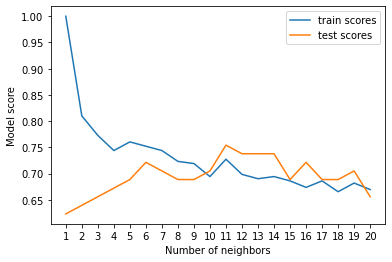

In [30]:
plt.plot(neighbors,train_scores, label="train scores")
plt.plot(neighbors,test_scores, label="test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data :  {max(test_scores)*100:.2f}%")

## hyperparameter tuning by randomizedsearchCV

we're going to tune logestic regression model and randomforest classifier using randomised search cv

In [31]:
# ceate a hyperparameter grid fro LogesticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# create hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators" : np.arange(10,1000,50),
          "max_depth" : [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

#### now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV


In [32]:
# Tune LogesticRegression
np.random.seed(42)

#setuprandom hyperparameter search for LogesticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


# Fit random hyperparameter search model for ogesticRegression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

now we've tune legosticregression let's do the same for randomforestclassifier

In [35]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
# evaluate the rf model

rs_rf.score(X_test,y_test)

0.8688524590163934

## tune hperparameters using grid search cv

since our Logistic Regression model provides the best results , we'll try and improve them again using GridSearchCV

In [38]:
# Different hyperparameter tuning for our LogesticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# setup grid hyprparameter search logesticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit gs model 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
# check the best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
# evluate gs model

gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [41]:
models_scores

{'Logestic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## evaluate our tuned machine learing classifier , beyond accuracy

* ROC curve  and AUC curve
* confusion matrix
* Classification report
* Precission
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.


to make comparisons and evaluate our model , first we need to make predictions

In [42]:
# make predections from tuned model
y_preds = gs_log_reg.predict(X_test)

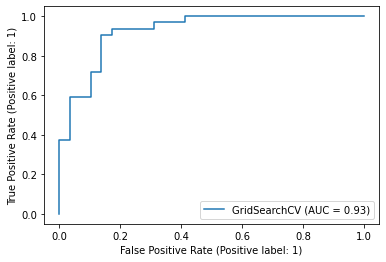

In [43]:
# plot roc curve and calculate auc score
plot_roc_curve(gs_log_reg,X_test,y_test);


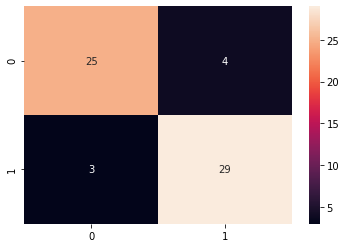

In [44]:
# using seaborn heatmap to plot confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat,annot = True);

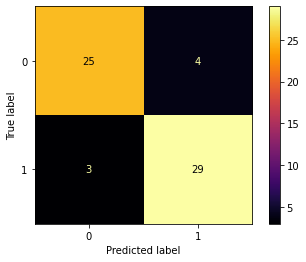

In [45]:
# using sklearn plot confusion matrix function 
plot_confusion_matrix(gs_log_reg,X_test,y_test,cmap="inferno");

In [46]:
#pip install yellowbrick

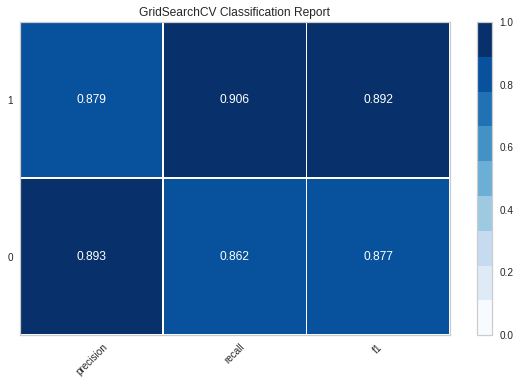

In [47]:
from yellowbrick.classifier import ClassificationReport

plot_class_rep = ClassificationReport(gs_log_reg,cmap="Blues")

plot_class_rep.fit(X_train,y_train)
plot_class_rep.score(X_test,y_test)
plot_class_rep.show();

In [48]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calculate evaluaton metrics using cross validation



In [49]:
# check best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# create a new classifier with best parameter
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [51]:
#cross validated accuracy
cv_acc = cross_val_score(clf,X,y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [52]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [53]:
#cross validated precission
cv_precission =  cross_val_score(clf,X,y,
                        cv=5,
                        scoring="precision")
cv_precission = np.mean(cv_precission)
cv_precission

0.8207936507936507

In [54]:
#cross validated recall
cv_recall =  cross_val_score(clf,X,y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [55]:
#cross validated f1-score
cv_f1 =  cross_val_score(clf,X,y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

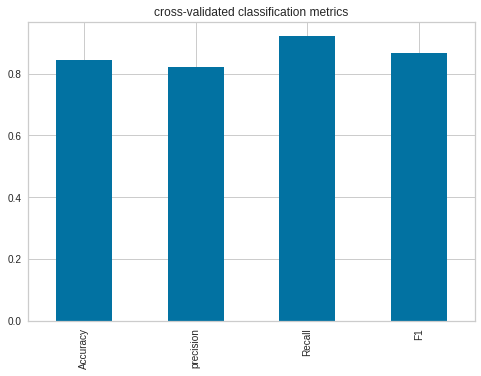

In [56]:
# visualisze our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "precision": cv_precission,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="cross-validated classification metrics",
                     legend=False);

### Feature Importance

Freatures  importance is another as asking , "which features contributed most to the outcome  of the model and how
did they contribute?"

finding feature importance is different for each machine learning model.

In [57]:
# fit an instance of logectic regression
# create a new classifier with best parameter
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train,y_train);

In [58]:
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [59]:
#match the coef withfeatures of columns
features_dict = dict(zip(df.columns , list(clf.coef_[0])))
features_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

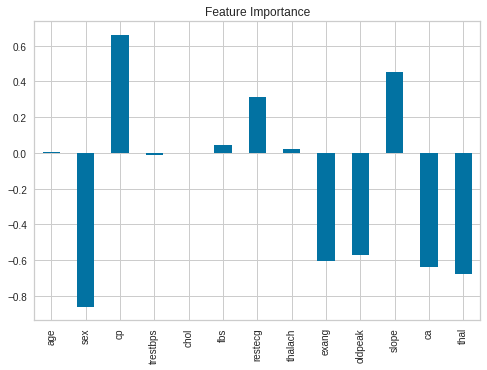

In [60]:
# visualize feature imortance

features_df = pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title="Feature Importance",
                      legend=False);

# Experimenting

In [61]:
'''
log_reg_grid2 = {"C" : [100,10,0.1,0.01,50],
                "solver": ["newton-cg","lbfgs","liblinear","sag","saga"],
                "penalty":['l1', 'l2', 'elasticnet', 'none'],
                "multi_class":["auto","ovr","multinomial"]}

gs_log_grid2 = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid2,
                           cv = 5,
                           verbose=True)
'''

'\nlog_reg_grid2 = {"C" : [100,10,0.1,0.01,50],\n                "solver": ["newton-cg","lbfgs","liblinear","sag","saga"],\n                "penalty":[\'l1\', \'l2\', \'elasticnet\', \'none\'],\n                "multi_class":["auto","ovr","multinomial"]}\n\ngs_log_grid2 = GridSearchCV(LogisticRegression(),\n                           param_grid=log_reg_grid2,\n                           cv = 5,\n                           verbose=True)\n'

In [63]:
#gs_log_grid2.fit(X_train,y_train)

In [64]:
#gs_log_grid2.score(X_test,y_test)

In [65]:
#gs_log_grid2.best_params_

In [66]:
#gs_log_reg.score(X_test,y_test)

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [68]:
classifiers = {
    "KNeighborsClassifier":KNeighborsClassifier(3),
    "SVC(kernel)":SVC(kernel="linear", C=0.025),
    "SVC(gamma)":SVC(gamma=2, C=1),
    "GaussianProcessClassifier":GaussianProcessClassifier(1.0 * RBF(1.0)),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "MLPClassifier":MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GaussianNB":GaussianNB(),
    "QuadraticDiscriminantAnalysis":QuadraticDiscriminantAnalysis(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier()}

In [69]:
#fit_and_score(classifiers,X_train,X_test,y_train,y_test)

In [70]:
#gs_log_grid2.score(X_test,y_test)

In [76]:

rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)


0.8852459016393442

In [72]:
hyperpara_rfc = {"n_estimators":[50,100,200],
                 "criterion":["gini","entropy"],
                 "max_depth":[5,8,15,25,30],
                 "max_features":["auto","sqrt", "log2"],
                 "min_samples_split":[2,5,10,15,100],
                 "min_samples_leaf":[1,2,5,10]}
                 

In [74]:
model_rs = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=hyperpara_rfc,
                             cv= 5,
                             n_iter=50,
                             verbose=True)
model_rs.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 15, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 200]},
                   verbose=True)

In [87]:
model_rs.score(X_test,y_test)

0.8852459016393442

In [77]:
model_rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

In [114]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9016393442622951

In [99]:
rfc.score(X_test,y_test)

0.9016393442622951

In [101]:
import pickle

pickle.dump(rfc,open('rfc.pkl','wb'))

In [102]:
loded_model = pickle.load(open("rfc.pkl",'rb'))

In [115]:
loded_model.score(X_test,y_test)

0.9016393442622951

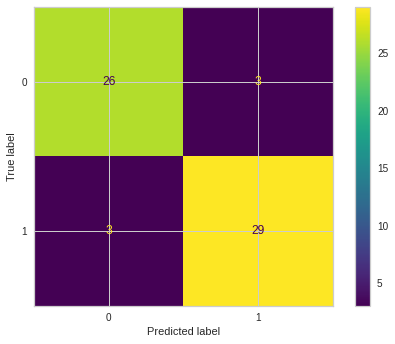

In [118]:
plot_confusion_matrix(loded_model,X_test,y_test)

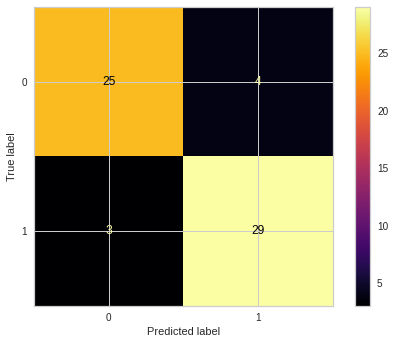

In [119]:
plot_confusion_matrix(gs_log_reg,X_test,y_test,cmap="inferno");